Universidad Francisco de Vitoria<br>
Grado en Ingeniería Informática

<hr>

# Complejidad Computacional
## Práctica 2: Divide y Vencerás

### Introducción

El presente notebook está diseñado para que los estudiantes apliquen de forma práctica sus conocimientos sobre algoritmos, complejidad computacional y paradigmas de la programación. A través de la programación en Python dentro de un entorno Jupyter, los alumnos desarrollarán diferentes actividades relacionadas con el paradigma de programación Divide y Vencerás

### Apartado 1: Karatsuba

El algoritmo de Karatsuba es un método eficiente para multiplicar números grandes, basado en el paradigma de programación divide y vencerás. Fue desarrollado por Anatolii Alexeevitch Karatsuba en 1962 y reduce el número de multiplicaciones requeridas para multiplicar dos números de $n$ dígitos. 

Se suponen dos números grandes, $x$ e $y$, que se quieren multiplicar. En lugar de realizar la multiplicación directamente, el algoritmo de Karatsuba divide estos números en partes más pequeñas y realiza una serie de cálculos que llevan a un resultado más eficiente.

1. Se divide cada número en dos partes de tamaño similar:
   - Para un número $x$ de $n$ dígitos, se puede dividir en dos partes:
     - $x_{\text{left}}$: los primeros $n/2$ dígitos.
     - $x_{\text{right}}$: los últimos $n/2$ dígitos.
   - Lo mismo aplica para el número $y$, dividiéndolo en $y_{\text{left}}$ e $y_{\text{right}}$.

2. Se calculan los productos parciales:
   - $P1 = x_{\text{left}} \times y_{\text{left}}$
   - $P2 = x_{\text{right}} \times y_{\text{right}}$
   - $P3 = (x_{\text{left}} + x_{\text{right}}) \times (y_{\text{left}} + y_{\text{right}})$

3. Se aplica la relación de Karatsuba para reducir el número de multiplicaciones:
   - El resultado se calcula combinando estos productos:
     $$
     \text{Resultado} = P1 \times 10^n + (P3 - P1 - P2) \times 10^{n/2} + P2
     $$
   - Aquí, el término $(P3 - P1 - P2)$ utiliza la aritmética para obtener el resultado final sin requerir todas las multiplicaciones individuales.


El algoritmo reduce la complejidad de la multiplicación de $O(n^2)$ a aproximadamente $O(n^{\log_2 3})$ (alrededor de $O(n^{1.585})$), lo que es una mejora significativa para números grandes.

**1.1) Implementad el algoritmo de Karatsuba.**

In [ ]:
# Implementación de la función "dividirNumeros"
# Dividir números es una función que divide los números en dos partes iguales, que será implementada en el algoritmo de Karatsuba. En ella se divide el parámetro "numero" que es un entero convirtiendolo en un string y dividiendo su longitud en dos mitades. Posteriormente se almacena cada una de las mitades en las variables izquierda y derecha convirtiéndolas de nuevo a entero para ser utilizadas. Izquierda y derecha es lo que devuelve la función (es decir cada una de las mitades)
# Parámetros:
#   - numero: int // Es el input del usuario (entero) que será dividido en partes iguales
# Return:
#   -izquierda: int // Mitad izquierda del número ingresado
#   -derecha: int // Mitad derecha del número ingresado 
def dividirNumeros(numero):
    numeroString = str(numero)
    mitad = len(numeroString) // 2
    izquierda = int(numeroString[mitad:])
    derecha = int(numeroString[:mitad])

    return izquierda,derecha

# Implementación de la función "karatsuba".
# Función karatsuba
#   Parámetros:
#       - a: int // Es el primer número de la multiplicación
#       - b: int // Es el segundo número de la multiplicación

def karatsuba(n1,n2):

    # Caso Base: En karatsuba el caso base se lleva a cabo cuando los números son lo suficientemente pequeños como para multiplicarlos directamente con el objetivo de reducir el coste computacional como se indica en el enunciado.
    # En este caso declaramos el caso base cuando uno de los dos números que se están multiplicando es menor que 10. Por lo que se puede ver en la condición con que uno de los dos números sea menor que 10 sería sufciente.
    if n1 < 10 or n2 < 10:
        return n1 * n2
    
    #####################
    ### En este bloque se implementa la lógica que va a dividir los números en dos partes (Divide y vencerás).

    #Calcular el número de dígitos de los números
    # - numDigitos: hace referencia al número de dígitos que tienen los números que multiplicamos
    # - mitadNumDigitos: Es la división (con resultado entero) entre 2 del número de dígitos de los números que multiplicamos
    numDigitos = max(len(str(n1)), len(str(n2)))
    mitadNumDigitos = numDigitos // 2 # Hacemos uso del operador "//" para realizar la división con resultado entero

    #Dividir los números en mitades utilizando la función dividirNumeros
    n1Izquierda, n1Derecha = dividirNumeros(n1)
    n2Izquierda, n2Derecha = dividirNumeros(n2)


    ###################
    ### En este bloque se implementa la lógica de los productos parciales de la multiplicación de karatsuba

    # Producto parcial 1: Tal y como se indica en el enunciado sería, prodParcial1 = (n1Izquierda + n2Izquierda)
    # Como lo que buscamos es la mayor eficiencia para números grandes hay que hacer una llamada recursiva a la función "karatsuba" para que siga dividiendo por la mitad las mitades que todavía no sean lo suficientemente pequeñas.
    prodParcial1 = karatsuba(n1Izquierda, n2Izquierda)

    # Producto parcial 2: Tal y como se indica en el enunciado sería, prodParcial2 = (n1Derecha + n2Derecha)
    # Como lo que buscamos es la mayor eficiencia para números grandes hay que hacer una llamada recursiva a la función "karatsuba" para que siga dividiendo por la mitad las mitades que todavía no sean lo suficientemente pequeñas.
    prodParcial2 = karatsuba(n1Derecha, n2Derecha)

    # Producto parcial 3: Tal y como se indica en el enunciado sería, prodParcial3 = ((n1Izquierda + n1Derecha) * (n2Izquierda + n2Derecha))
    # Como lo que buscamos es la mayor eficiencia para números grandes hay que hacer una llamada recursiva a la función "karatsuba" para que siga dividiendo por la mitad las mitades que todavía no sean lo suficientemente pequeñas.
    prodParcial3 = karatsuba(n1Izquierda + n1Derecha, n2Izquierda + n2Derecha)

    ########################
    ### Resultado de la multiplicación de karatsuba 
    resultado = prodParcial1 * 10**(2 * mitadNumDigitos) + (prodParcial3 - prodParcial2 - prodParcial1) * 10**mitadNumDigitos + prodParcial2

    return resultado


n1 = int(input("Introduce el primer número: "))
n2 = int(input("Introduce el segundo número: "))

resultado = karatsuba(n1, n2)

print(f"El resultado de la multiplicación de {n1} y {n2} usando Karatsuba es: {resultado}")

El resultado de la multiplicación de 2345678923456789 y 9876543298765432 usando Karatsuba es: 28066104971161448750343751205848


**1.2) Para vuestra implementación concreta, calculad el $T(n)$. En este caso, puede que lo defináis como $T(a,b)$.**

### Apartado 2: Comparativa de DyV con respecto a la aproximación clásica

**2.1) Elegid 20 pares de números grandes (podéis generarlos con un generador de números aleatorios) y multiplicadlos haciendo uso, por un lado de vuestro algoritmo y por otro lado, de la multiplicación clásica (*). Para ello, debéis usar la clase `Multiplicacion`.**

**2.2) Comparad en términos temporales la ejecución de las multiplicaciones y graficad dichos resultados (el eje X debe ser el número de cifras que tenían los números que se multiplicaban y el eje Y el tiempo en milisegundos que ha tardado en devolver el resultado). ¿Qué conclusiones podéis sacar?**

**2.3) ¿Qué sucede si en lugar de multiplicar números muy grandes se multiplican números muy pequeños?**


[1] Multiplicación clásica de 712972929677834399554727390350306371512310689447464149428827237 y 85189657854620272870426426870211252701249334135234203436881368667339744482495917273818771424240515 = 60737919938860952711366365665529304962382700881787164476743564046950587457801911239210032675125304087085799669490291646878298475925670145250411204388349870907055 || El tiempo de ejecución fue de 0.002100 milisegundos
[1] Multiplicación karatsuba de 712972929677834399554727390350306371512310689447464149428827237 y 85189657854620272870426426870211252701249334135234203436881368667339744482495917273818771424240515 = 940928970771600433301487622438410021443521484889077550692490643259521521093177238089323371095349382700561034491083775263560219647086709614440233241921383440091071195625179330061459222051337957 || El tiempo de ejecución fue de 2.755600 milisegundos


--- Lista de el número de dígitos de los números multiplicados
[98]

--- Lista de los tiempos de ejecución de las multiplicaciones con el

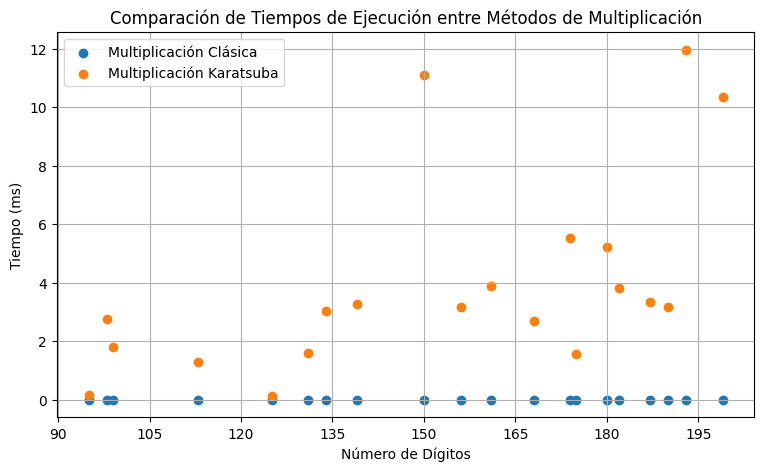

[1] Multiplicación clásica de 15 y 14 = 210 || El tiempo de ejecución fue de 0.000700 milisegundos
[1] Multiplicación karatsuba de 15 y 14 = 2091 || El tiempo de ejecución fue de 0.026000 milisegundos


--- Lista de el número de dígitos de los números pequeños multiplicados
[2]

--- Lista de los tiempos de ejecución de las multiplicaciones de números pequeños con el operando * 
[0.0007]

--- Lista de los tiempos de ejecución de las multiplicaciones  de números pequeños con Karatsuba
[0.026]
---------------------------------------------------------------------------------------------------------------------------------------
[2] Multiplicación clásica de 28 y 20 = 560 || El tiempo de ejecución fue de 0.000600 milisegundos
[2] Multiplicación karatsuba de 28 y 20 = 164 || El tiempo de ejecución fue de 0.006000 milisegundos


--- Lista de el número de dígitos de los números pequeños multiplicados
[2, 2]

--- Lista de los tiempos de ejecución de las multiplicaciones de números pequeños con 

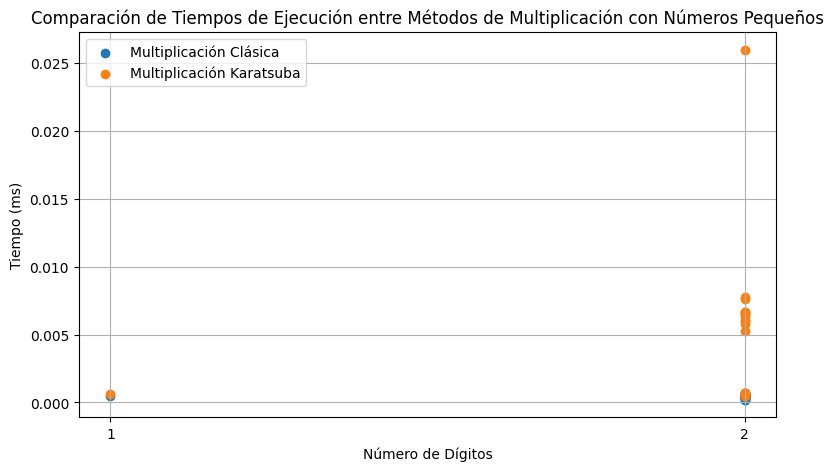

In [5]:
import time # usad esta librería para calcular los tiempos de ejecución de cada método
import random # importar la librería random para generar los números aleatorios 
import matplotlib.pyplot as plt # Librería matplotlib para graficar los datos finales del ejercicio
from matplotlib.ticker import MaxNLocator # Biblioteca para controlar la apariencia del output de la gráfica y ajustar la legibilidad de la gráfica. Sirve para controlar como se representa la gráfica de una manera más precisa pudiendo evitar valores automáticos. En este caso lo que se pretende con esto es mostrar el eje X solo con números enteros. MaxNlocator es lo que permite limitar el número de marcas en el eje


def dividirNumeros(numero):
    numeroString = str(numero)
    mitad = len(numeroString) // 2
    izquierda = int(numeroString[mitad:])
    derecha = int(numeroString[:mitad])

    return izquierda,derecha

class Multiplicacion():
    def __init__(self, a, b):
        self.a = a # número grande 1
        self.b = b # número grande 2
        self.result = 0 # resultado
        self.t_mult = 0 # tiempo en ejecutar la multiplicación clásica
        self.t_kara = 0 # tiempo en ejecutar la multiplicación por karatsuba


    #### Funciones de la clase multiplicación
    # mult_clasica
    # Metodos a los que llama:
    #   - resultadoMultClásica --> Calcular la multiplicación con el operador clásico
    #   - t_mult --> Guardar el tiempo de ejecución de la operación de multiplicación con el operador clásico
    #
    # Uso de librería time
    # Dentro de la librería time se hace uso de la función time.perf_counter_ns() que es de los más precisos para calcular tiempos de ejecución en operaciones muy rápidas. Calcula en nanosegundos.
    def mult_clasica(self):
        tiempoInicio = time.perf_counter_ns() # Iniciar "cronómetro" de la operación
        self.resultadoMultClasica = self.a * self.b 
        self.t_mult = (time.perf_counter_ns() - tiempoInicio) / 1000000 # Recoger el tiempo final de ejecución y dividirlo para expresarlo en milisegundos


    def mult_karatsuba(self):
        tiempoInicio = time.perf_counter_ns()
        self.resultadoMultKaratsuba = self.karatsuba(self.a, self.b)
        self.t_kara = (time.perf_counter_ns() - tiempoInicio) / 1000000


    ### Función de multiplicación Karatsuba implementada y comentada en el apartado 1 de la práctica
    def karatsuba(self, a, b):

        if a < 10 or b < 10:
            return a * b
        
        numDigitos = max(len(str(a)), len(str(b)))
        mitadNumDigitos = numDigitos // 2

        aIzquierda, aDerecha = dividirNumeros(a)
        bIzquierda, bDerecha = dividirNumeros(b)

        prodParcial1 = self.karatsuba(aIzquierda, bIzquierda)
        prodParcial2 = self.karatsuba(aDerecha, bDerecha)
        prodParcial3 = self.karatsuba(aIzquierda + aDerecha, bIzquierda + bDerecha)

        resultado = prodParcial1 * 10**(2*mitadNumDigitos) + (prodParcial3 - prodParcial2 - prodParcial1)* 10 ** mitadNumDigitos + prodParcial2 
        return resultado
        

multiplicaciones = [] # lista que contendrá las instancias de la clase Multiplicacion, se usa también en el apartado 3
numeroDigitos = []
tiemposMultClasica = []
tiemposKaratsuba = []

for i in range(1,21):
    digitosA = random.randint(50, 200)
    a = random.randint(10**(digitosA - 1), 10**digitosA - 1)
    digitosB = random.randint(10, 200)
    b = random.randint(10**(digitosB - 1), 10**digitosB - 1)

    mult = Multiplicacion(a, b)

    mult.mult_clasica()
    print(f"[{i}] Multiplicación clásica de {a} y {b} = {mult.resultadoMultClasica} || El tiempo de ejecución fue de {mult.t_mult:.6f} milisegundos")

    mult.mult_karatsuba()
    print(f"[{i}] Multiplicación karatsuba de {a} y {b} = {mult.resultadoMultKaratsuba} || El tiempo de ejecución fue de {mult.t_kara:.6f} milisegundos")

    multiplicaciones.append(mult)

    numeroDigitos.append(max(len(str(a)), len(str(b))))
    tiemposMultClasica.append(mult.t_mult)
    tiemposKaratsuba.append(mult.t_kara)

    print("\n\n--- Lista de el número de dígitos de los números multiplicados")
    print(numeroDigitos)

    print("\n--- Lista de los tiempos de ejecución de las multiplicaciones con el operando * ")
    print(tiemposMultClasica)

    print("\n--- Lista de los tiempos de ejecución de las multiplicaciones con Karatsuba")
    print(tiemposKaratsuba)

    print("---------------------------------------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(9, 5)) #Tamaño de la gráfica
plt.scatter(numeroDigitos, tiemposMultClasica, label='Multiplicación Clásica', marker='o') #Utilizamos plt.scatter para representar como puntos de dispersión en vez de de manera lineal.
plt.scatter(numeroDigitos, tiemposKaratsuba, label='Multiplicación Karatsuba', marker='o') 
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))# plt.gca().xaxsis sirve para obtener el eje X que es el que queremos modificar. MaxNlocator(integer=True) sirve para que el eje X solo represente números enteros.
plt.xlabel('Número de Dígitos') # Titulo del eje X
plt.ylabel('Tiempo (ms)') #Titulo del eje Y
plt.title('Comparación de Tiempos de Ejecución entre Métodos de Multiplicación') #Titulo de la gráfica
plt.legend() #Leyenda para la gráfica
plt.grid(True) #Acativar la cuadrícula de fondo
plt.show()

################################################################################################################################################
#################################################################################################################################################
numeroDigitosPeques = []
tiemposMultClasicaPeques = []
tiemposKaratsubaPeques = []

for i in range(1,21):
    digitosA = random.randint(2, 30)
    a = random.randint(digitosA - 1, digitosA - 1)
    digitosB = random.randint(2, 30)
    b = random.randint(digitosB - 1, digitosB - 1)

    mult = Multiplicacion(a, b)

    mult.mult_clasica()
    print(f"[{i}] Multiplicación clásica de {a} y {b} = {mult.resultadoMultClasica} || El tiempo de ejecución fue de {mult.t_mult:.6f} milisegundos")

    mult.mult_karatsuba()
    print(f"[{i}] Multiplicación karatsuba de {a} y {b} = {mult.resultadoMultKaratsuba} || El tiempo de ejecución fue de {mult.t_kara:.6f} milisegundos")

    multiplicaciones.append(mult)

    numeroDigitosPeques.append(max(len(str(a)), len(str(b))))
    tiemposMultClasicaPeques.append(mult.t_mult)
    tiemposKaratsubaPeques.append(mult.t_kara)

    print("\n\n--- Lista de el número de dígitos de los números pequeños multiplicados")
    print(numeroDigitosPeques)

    print("\n--- Lista de los tiempos de ejecución de las multiplicaciones de números pequeños con el operando * ")
    print(tiemposMultClasicaPeques)

    print("\n--- Lista de los tiempos de ejecución de las multiplicaciones  de números pequeños con Karatsuba")
    print(tiemposKaratsubaPeques)

    print("---------------------------------------------------------------------------------------------------------------------------------------")


plt.figure(figsize=(9, 5))
plt.scatter(numeroDigitosPeques, tiemposMultClasicaPeques, label='Multiplicación Clásica', marker='o')
plt.scatter(numeroDigitosPeques, tiemposKaratsubaPeques, label='Multiplicación Karatsuba', marker='o')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Número de Dígitos')
plt.ylabel('Tiempo (ms)')
plt.title('Comparación de Tiempos de Ejecución entre Métodos de Multiplicación con Números Pequeños')
plt.legend()
plt.grid(True)
plt.show()


### Apartado 3: Búsqueda binaria
**3.1) Dados los resultados del apartado anterior, ordenad las instancias de las clases en función ascendente del tiempo `t_kara` y, aplicando búsqueda binaria, mostrad la instancia de la clase `Multiplicacion` cuyo `t_kara` se aproxima más a 1 segundo.**

**3.2) Ahora, ordenad los resultados en función ascendente del tiempo `t_mult` y aplicando búsqueda binaria, mostrad la instancia de la clase `Multiplicacion` cuyo `t_kara` se aproxima más a 1 segundo. ¿Qué sucede?**


In [ ]:
# import ordenacion_qs
# def ordenacion_qs():
#     pass
# def ordenacion_selection():
#     pass
# ....

multiplicaciones_ordenadas = []

def busqueda_binaria():
    pass

### Apartado 4: La convolución

La convolución es una operación matemática que combina dos funciones para producir una tercera función. En el contexto de señales y sistemas, la convolución se utiliza para aplicar filtros a las señales. 

La convolución discreta es una operación matemática que permite combinar dos secuencias de datos (como señales) para obtener una nueva secuencia que representa el efecto de aplicar una "respuesta" o "filtro" a la señal original. La convolución discreta entre dos secuencias $x[n]$ y $h[n]$ es una operación conmutativa que se define de la siguiente manera:

$$
y[n] = \sum_{k=0}^{N-1} x[k] \cdot h[n - k]
$$

donde $y[n]$ es el resultado de la convolución, y $N$ es la longitud de las secuencias. En procesamiento de señales, esta operación es útil para aplicar filtros y modificar las características de una señal.

[Vídeo recomendado](https://youtu.be/KuXjwB4LzSA?si=wENdsEvWMhDwoJgj)

**4.1) Investigad y responded brevemente:**
   - ¿Qué es la convolución discreta y cómo se utiliza en procesamiento de señales?
   - ¿Por qué se utiliza el paradigma de divide y vencerás para optimizar este cálculo en secuencias grandes?

**4.2) Considerando que los arrays `multiplicaciones_ordenadas->t_kara` y `multiplicaciones_ordenadas->t_mul` son dos arrays de señales, escribid una función que realice la convolución discreta entre dichos arrays aplicando el paradigma de divide y vencerás.**


In [ ]:
def convolucion_DyV(a, b):
    pass

**4.3) Calculad el $T(n)$ de la función concreta que desarrolleis.**